In [79]:
#import tools
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings
import psycopg2
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [80]:
#import data from Kaggle
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine= create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
education= pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [81]:
#Clean data 
fill_list= ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 
            'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 
            'GRADES_ALL_G']

years = education["YEAR"].unique()

education.sort_values(['STATE', 'YEAR'], inplace=True)

for col in fill_list:
    if [education['YEAR'] == max(years)]:
        education.loc[:, col].fillna(
        method='ffill', inplace=True)
    elif [education['YEAR'] == min(years)]:
        education.loc[:, col].dropna(inplace=True)
    else:
        education.loc[:, col].interpolate(inplace=True)
education.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
260,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,NaN,NaN,NaN,NaN
312,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,NaN,NaN,NaN,NaN
363,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,NaN,NaN,NaN,NaN
416,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
468,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,683042.0,NaN,NaN,NaN,NaN


In [82]:
education.isnull().sum()*100/education.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.067024
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.067024
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

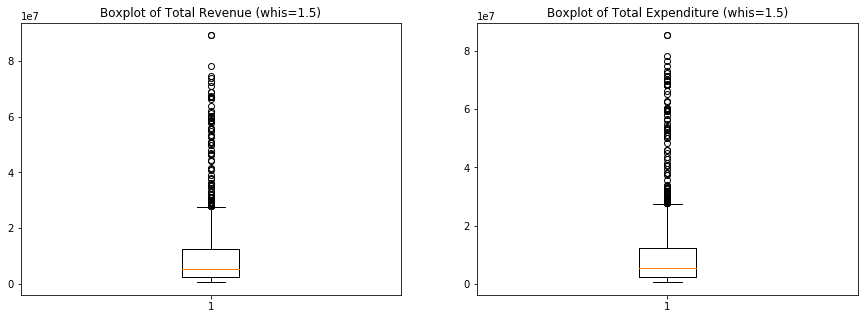

Yes, both variables have many outliers above the top whisker (Q3 + (1.5*IQR)) range.


In [83]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(education['TOTAL_REVENUE'])
plt.title('Boxplot of Total Revenue (whis=1.5)')

plt.subplot(1, 2, 2)
plt.boxplot(education['TOTAL_EXPENDITURE'])
plt.title('Boxplot of Total Expenditure (whis=1.5)')

plt.show()

print('Yes, both variables have many outliers above the top whisker (Q3 + (1.5*IQR)) range.')

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [84]:
#One way winsorize data to eliminate high outliers
winsorized_revenue= winsorize(education['TOTAL_REVENUE'], (0 , 0.10))
winsorized_expenditure= winsorize(education['TOTAL_EXPENDITURE'], (0 , 0.10))
winsorized_expenditure

masked_array(data=[2653798., 2833433., 3103266., ..., 1942406., 2034229.,
                   2034229.],
             mask=False,
       fill_value=1e+20)

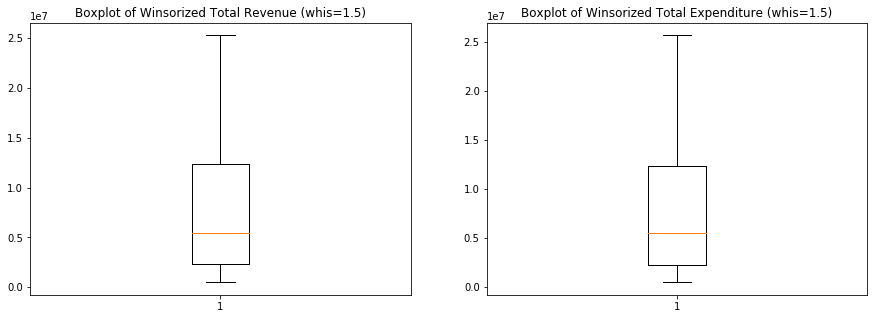

In [85]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_revenue)
plt.title('Boxplot of Winsorized Total Revenue (whis=1.5)')

plt.subplot(1, 2, 2)
plt.boxplot(winsorized_expenditure)
plt.title('Boxplot of Winsorized Total Expenditure (whis=1.5)')

plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [86]:
#Create variable
education['DEFICIT']= education['TOTAL_REVENUE']-education['TOTAL_EXPENDITURE']

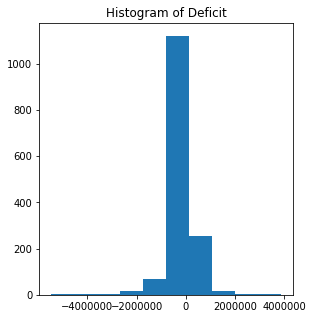

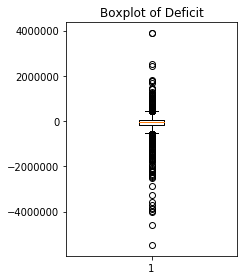

In [87]:
#plot outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(education['DEFICIT'])
plt.title('Histogram of Deficit')
plt.show()

plt.subplot(1, 2, 2)
plt.boxplot(education['DEFICIT'])
plt.title('Boxplot of Deficit')

plt.tight_layout()
plt.show()

In [88]:
education['log_def']= np.log(education['DEFICIT'])

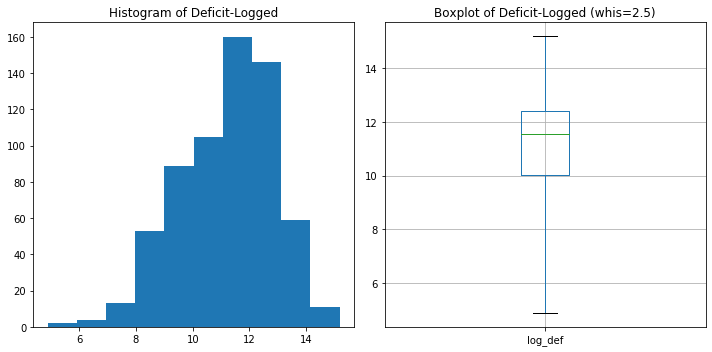

In [132]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(education['log_def'])
plt.title('Histogram of Deficit-Logged')

plt.subplot(1, 2, 2)
education.boxplot('log_def', whis=2.5)
plt.title('Boxplot of Deficit-Logged (whis=2.5)')

plt.tight_layout()
plt.show()


4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [91]:
#Create variable
education['SURPLUS']= winsorized_revenue-winsorized_expenditure

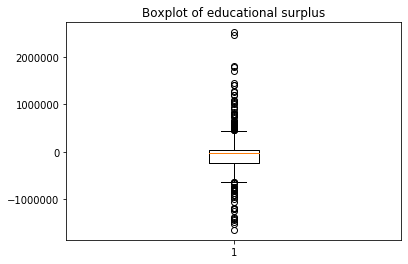

In [92]:
#plot to gauge outliers
plt.boxplot(education['SURPLUS'])
plt.title('Boxplot of educational surplus')

plt.show()

In [93]:
#eliminate outliers
education['winsorized_surplus']= winsorize(education['SURPLUS'], (0.05, 0.05))

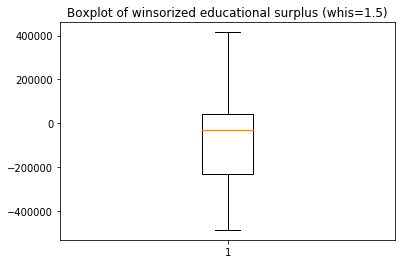

In [94]:
plt.boxplot(winsorized_surplus)
plt.title('Boxplot of winsorized educational surplus (whis=1.5)')

plt.show()

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [96]:
education[['DEFICIT', 'log_def', 'SURPLUS', 'winsorized_surplus']].describe()

,DEFICIT,log_def,SURPLUS,winsorized_surplus
count,1.492000e+03,642.000000,1.492000e+03,1492.000000
mean,-9.943955e+04,11.229695,-6.368449e+04,-67323.575067
std,5.689052e+05,1.637962,3.276774e+05,231198.836114
min,-5.487742e+06,4.890349,-1.650831e+06,-487134.000000
25%,-1.808150e+05,10.028964,-2.315270e+05,-231527.000000
50%,-1.934950e+04,11.525401,-3.018050e+04,-30180.500000
75%,6.616175e+04,12.409279,4.061425e+04,40614.250000
max,3.897129e+06,15.175751,2.520706e+06,415590.000000


Deficit vs. deficit logged shows much lower numbers and all positive due to the log function having been applied, but the count does not include every entry in the original df. The winsorized surplus has the same median and quartile range, but the min and max are much closer to the IQR as the original surplus column.

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I would use the method of winsorizing in the 4th question as it kept all records intact and more closely resembles the original column's distribution.